<h1 style=font-size:30px><b>Importing Libraries</h1>

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

<br><h1 style=font-size:30px><b>Data Preparation</h1>

<h2 style=font-size:20px><b><u>Reading the Data</u></h2>


In [23]:
df = pd.read_excel("data/SeoulBikeData.xlsx")
df

,Date,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,2017-12-01,0,-5.2,37.0,2.2,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,2017-12-01,1,-5.5,NaN,0.8,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2017-12-01,2,-6.0,39.0,NaN,"2,000",-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,2017-12-01,3,-6.2,40.0,0.9,"2,000",-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,2017-12-01,4,-6.0,36.0,2.3,"2,000",-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34.0,2.6,"1,894",-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,2018-11-30,20,3.4,37.0,2.3,"2,000",-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,2018-11-30,21,2.6,39.0,0.3,"1,968",-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,2018-11-30,22,NaN,41.0,1.0,"1,859",-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


The fields/variables along with their data types are as follows:
<br><br>

| Column / Field / Variable |    Data type    |
|:-------------------------:|:---------------:|
|           Date            |    Datetime     | 
|           Hour            |     Integer     | 
|      Temperature(∞C)      |      Float      |
|        Humidity(%)        |      Float      |
|     Wind speed (m/s)      |      Float      |
|     Visibility (10m)      | Object (String) |
| Dew point temperature(∞C) |      Float      |
|  Solar Radiation (MJ/m2)  |      Float      |
|       Rainfall(mm)        |      Float      |
|       Snowfall (cm)       |      Float      |
|          Seasons          | Object (String) |
|          Holiday          | Object (String) |
|      Functioning Day      | Object (String) |
|      Rented Bike Count      |     Integer     |
<br>


In [24]:
#Validating the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(∞C)            8322 non-null   float64       
 3   Humidity(%)                8322 non-null   float64       
 4   Wind speed (m/s)           8322 non-null   float64       
 5   Visibility (10m)           8760 non-null   object        
 6   Dew point temperature(∞C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

In [25]:
df.describe()

,Date,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,8760,8760.000000,8322.000000,8322.000000,8322.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,11.500000,12.902547,58.528238,1.729801,4.073813,0.569111,0.148687,0.075068,704.602055
min,2017-12-01 00:00:00,0.000000,-17.800000,0.000000,0.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,5.750000,3.500000,42.250000,0.900000,-4.700000,0.000000,0.000000,0.000000,191.000000
50%,2018-06-01 00:00:00,11.500000,13.800000,57.000000,1.500000,5.100000,0.010000,0.000000,0.000000,504.500000
75%,2018-08-31 00:00:00,17.250000,22.500000,74.000000,2.300000,14.800000,0.930000,0.000000,0.000000,1065.250000
max,2018-11-30 00:00:00,23.000000,39.400000,700.000000,7.400000,27.200000,3.520000,35.000000,8.800000,3556.000000
std,NaN,6.922582,11.958612,23.212680,1.038008,13.060369,0.868746,1.128193,0.436746,644.997468


In [26]:
MissingValues= df.isnull().sum()
MissingValues

Date                           0
Hour                           0
Temperature(∞C)              438
Humidity(%)                  438
Wind speed (m/s)             438
Visibility (10m)               0
Dew point temperature(∞C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                        0
Holiday                        0
Functioning Day                0
Rented Bike Count              0
dtype: int64

<br><h1 style=font-size:30px><b>Data Cleaning & Preparation</h1>

<h2 style=font-size:20px><b><u>Data Wrangling</u></h2>

In [27]:
df["Visibility (10m)"]=df["Visibility (10m)"].apply(lambda x: int(x.replace(",","")))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Hour                       8760 non-null   int64         
 2   Temperature(∞C)            8322 non-null   float64       
 3   Humidity(%)                8322 non-null   float64       
 4   Wind speed (m/s)           8322 non-null   float64       
 5   Visibility (10m)           8760 non-null   int64         
 6   Dew point temperature(∞C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

In [28]:
df.insert(1, "Month", df["Date"].dt.month)
df.insert(2, "Day", df["Date"].dt.day_name())
df.drop(columns=["Date"], inplace=True)
df

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,12,Friday,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,12,Friday,1,-5.5,NaN,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,12,Friday,2,-6.0,39.0,NaN,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,12,Friday,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,12,Friday,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,Friday,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,11,Friday,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,11,Friday,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,11,Friday,22,NaN,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


<h2 style=font-size:20px><b><u>Data Cleaning</u></h2>

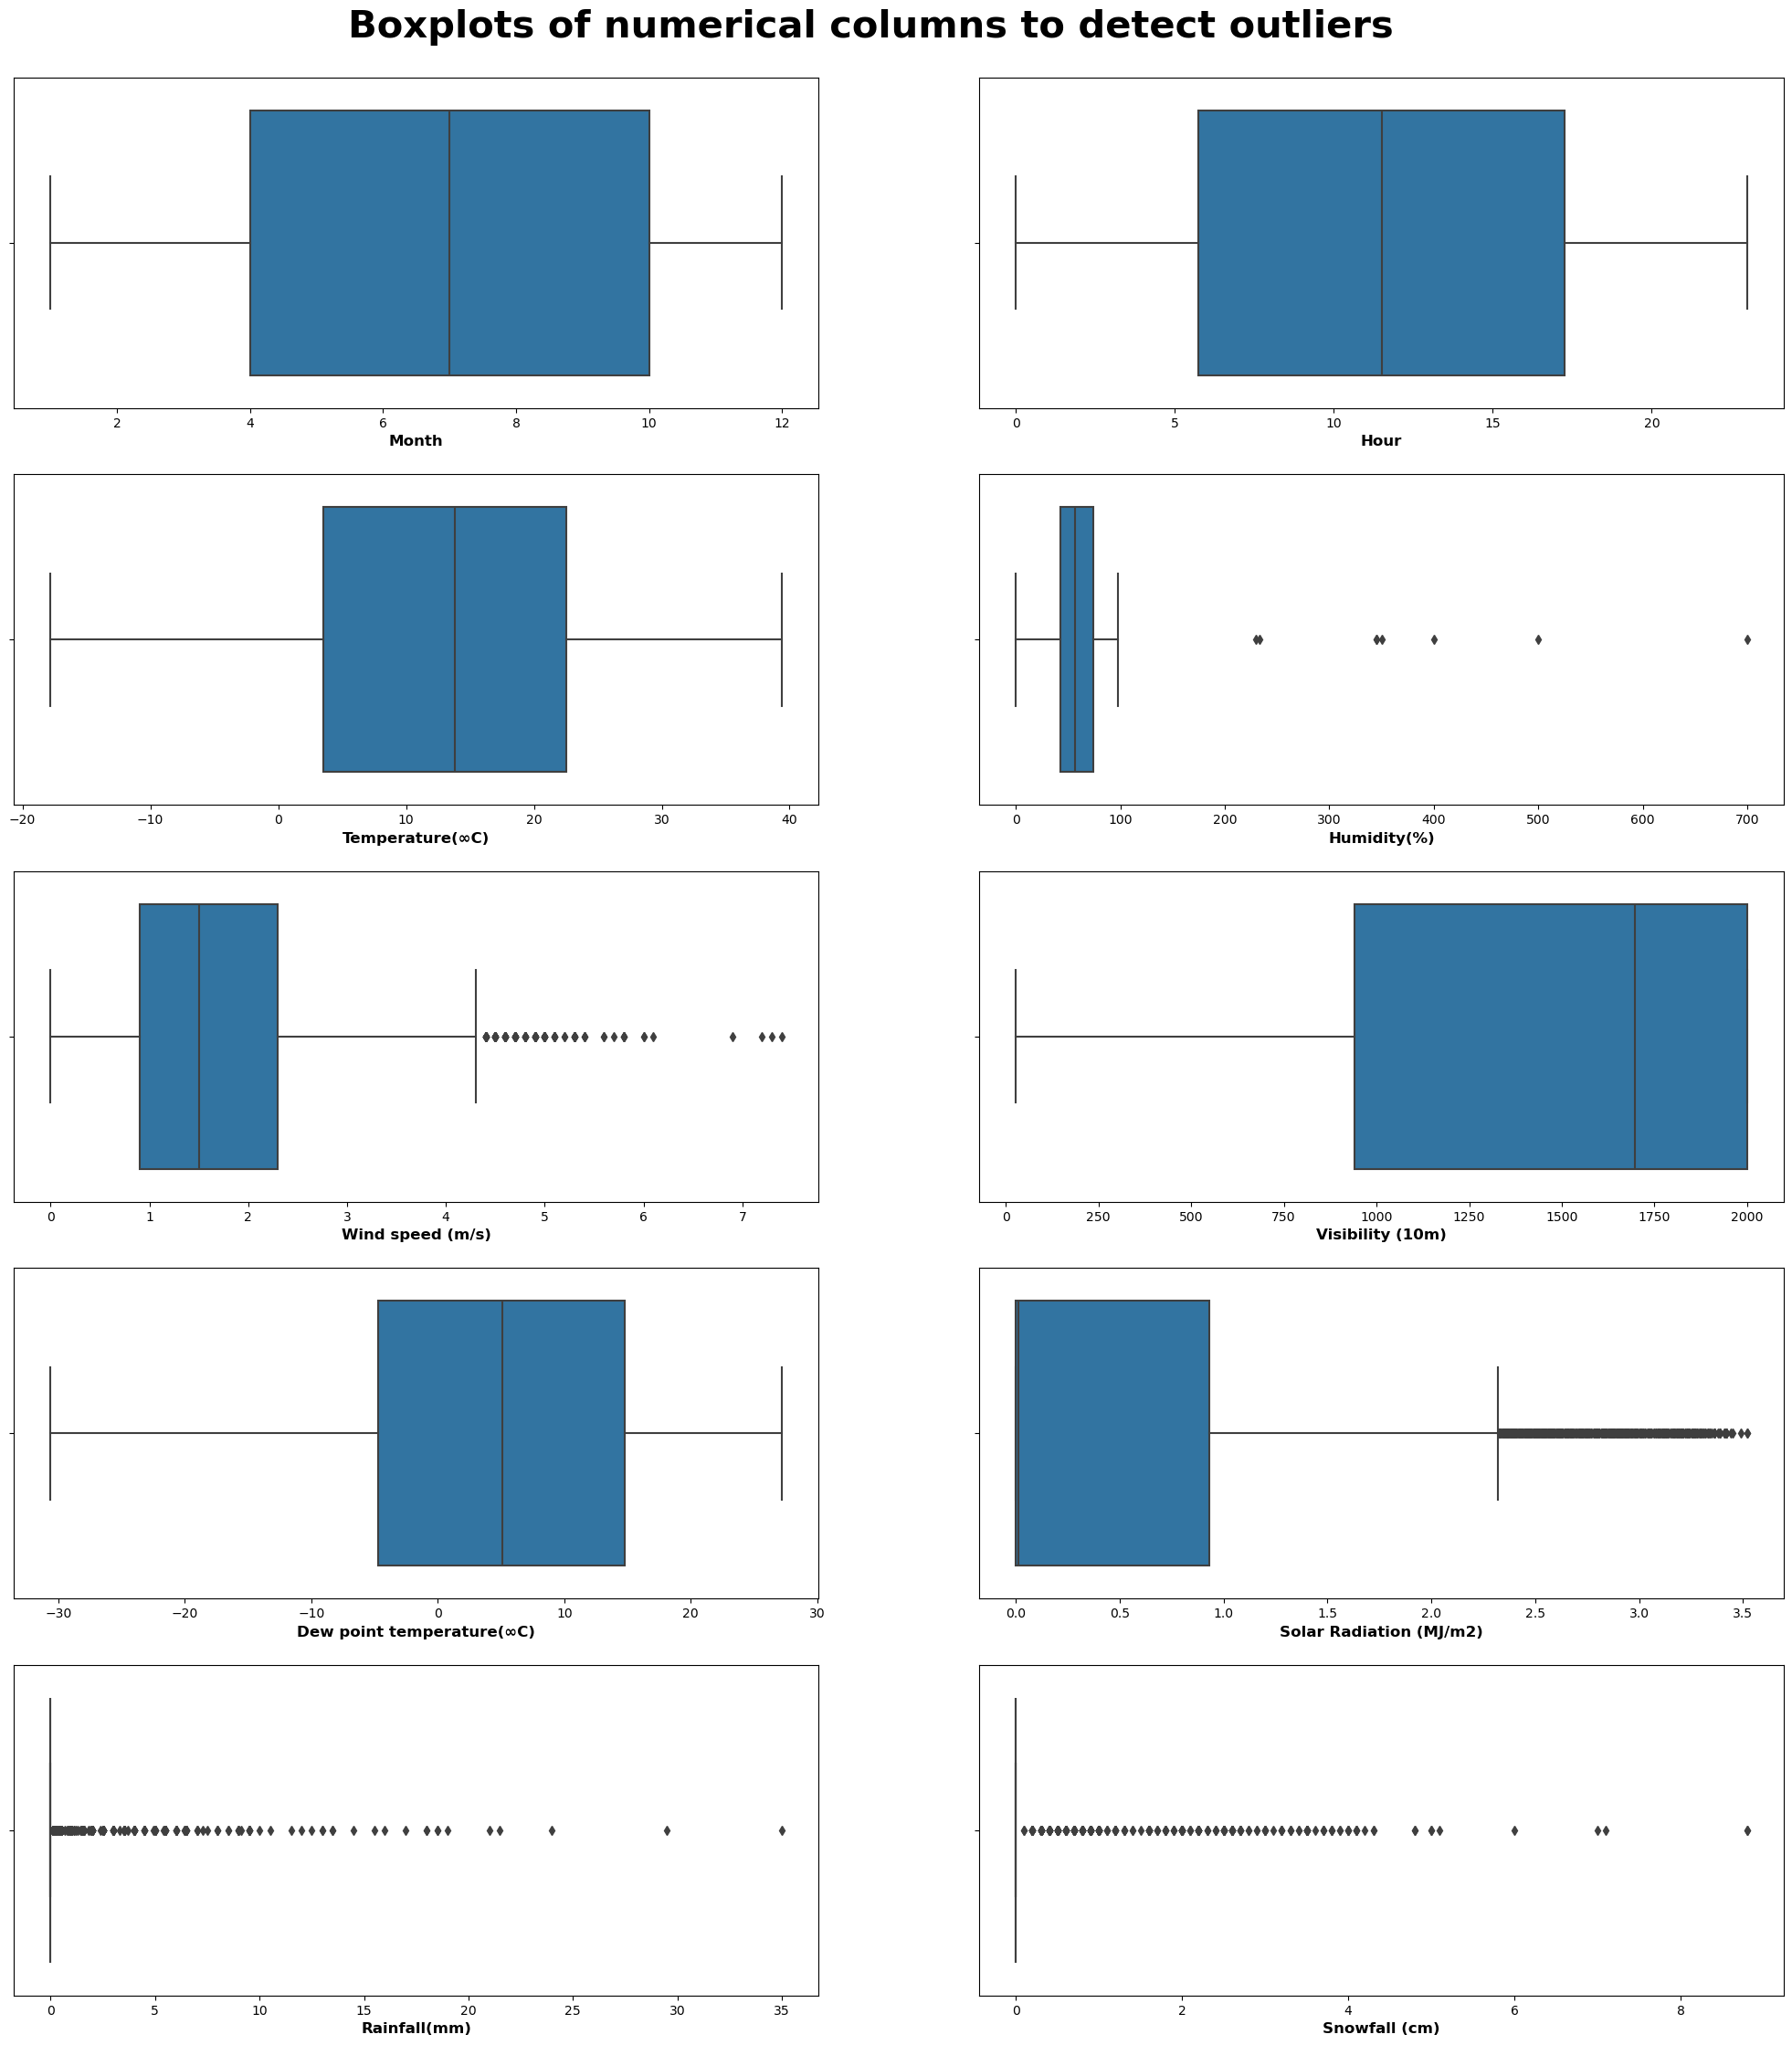

In [29]:
numerical_columns = df.select_dtypes(include = 'number').columns.drop(["Rented Bike Count"])
fig, axes = plt.subplots(nrows = len(numerical_columns) // 2 , ncols = 2, figsize = (25,25))

for index, column in enumerate(numerical_columns):
    sns.boxplot(data = df, x = column, ax = axes.flatten()[index])
    axes.flatten()[index].set_xlabel(f"{column}", fontweight='bold', fontsize='large')

plt.suptitle("Boxplots of numerical columns to detect outliers", fontsize = 30, fontweight = 'bold')
plt.subplots_adjust(top = 0.95)
plt.show()

In [30]:
IQR = np.percentile(df["Temperature(∞C)"], 75) - np.percentile(df["Temperature(∞C)"], 25)
upper_whisker = df['Temperature(∞C)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Temperature(∞C)'].quantile(0.25) - 1.5*IQR
display(df[(df['Temperature(∞C)'] > upper_whisker) | (df['Temperature(∞C)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count


<br>The above indicates that there are no outliers in the Temperature column.<br><br>


In [31]:
IQR = np.percentile(df["Humidity(%)"], 75) - np.percentile(df["Humidity(%)"], 25)
upper_whisker = df['Humidity(%)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Humidity(%)'].quantile(0.25) - 1.5*IQR
display(df[(df['Humidity(%)'] > upper_whisker) | (df['Humidity(%)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count


<br>The above are the outliers in the Humidity column.<br><br>

In [32]:
IQR = np.percentile(df["Wind speed (m/s)"], 75) - np.percentile(df["Wind speed (m/s)"], 25)
upper_whisker = df['Wind speed (m/s)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Wind speed (m/s)'].quantile(0.25) - 1.5*IQR
display(df[(df['Wind speed (m/s)'] > upper_whisker) | (df['Wind speed (m/s)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count


<br>The above are the outliers in the Wind speed column.<br><br>

In [33]:
IQR = np.percentile(df["Visibility (10m)"], 75) - np.percentile(df["Visibility (10m)"], 25)
upper_whisker = df['Visibility (10m)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Visibility (10m)'].quantile(0.25) - 1.5*IQR
display(df[(df['Visibility (10m)'] > upper_whisker) | (df['Visibility (10m)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count


<br>The above indicates that there are no outliers in the Visibility column.<br><br>

In [34]:
IQR = np.percentile(df["Dew point temperature(∞C)"], 75) - np.percentile(df["Dew point temperature(∞C)"], 25)
upper_whisker = df['Dew point temperature(∞C)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Dew point temperature(∞C)'].quantile(0.25) - 1.5*IQR
display(df[(df['Dew point temperature(∞C)'] > upper_whisker) | (df['Dew point temperature(∞C)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count


<br>The above indicates that there are no outlier in the Dew point temperature column.<br><br>

In [35]:
IQR = np.percentile(df["Solar Radiation (MJ/m2)"], 75) - np.percentile(df["Solar Radiation (MJ/m2)"], 25)
upper_whisker = df['Solar Radiation (MJ/m2)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Solar Radiation (MJ/m2)'].quantile(0.25) - 1.5*IQR
display(df[(df['Solar Radiation (MJ/m2)'] > upper_whisker) | (df['Solar Radiation (MJ/m2)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
1741,2,Sunday,13,-2.4,28.0,3.0,1953,-18.4,2.35,0.0,0.0,Winter,No Holiday,Yes,212
1885,2,Saturday,13,-0.4,15.0,2.4,1938,-23.9,2.46,0.0,0.0,Winter,Holiday,Yes,193
1886,2,Saturday,14,-0.1,15.0,4.0,2000,-23.7,2.39,0.0,0.0,Winter,Holiday,Yes,258
1982,2,Wednesday,14,3.3,14.0,2.9,1985,-21.7,2.49,0.0,0.0,Winter,No Holiday,Yes,365
2054,2,Saturday,14,6.9,19.0,1.9,1843,-15.1,2.36,0.0,0.0,Winter,No Holiday,Yes,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,10,Friday,13,NaN,33.0,1.8,2000,2.2,2.43,0.0,0.0,Autumn,No Holiday,Yes,1190
7764,10,Saturday,12,17.7,33.0,2.2,1556,1.2,2.37,0.0,0.0,Autumn,No Holiday,Yes,1407
7765,10,Saturday,13,NaN,26.0,1.1,1942,-0.6,2.45,0.0,0.0,Autumn,No Holiday,Yes,1585
7788,10,Sunday,12,18.4,28.0,1.9,1690,-0.4,2.33,0.0,0.0,Autumn,No Holiday,Yes,1417


<br>The above are the outliers in the Solar Radiation column.<br><br>

In [36]:
IQR = np.percentile(df["Rainfall(mm)"], 75) - np.percentile(df["Rainfall(mm)"], 25)
upper_whisker = df['Rainfall(mm)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Rainfall(mm)'].quantile(0.25) - 1.5*IQR
display(df[(df['Rainfall(mm)'] > upper_whisker) | (df['Rainfall(mm)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
51,12,Sunday,3,3.4,71.0,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes,117
54,12,Sunday,6,3.4,86.0,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes,13
57,12,Sunday,9,3.5,91.0,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes,152
78,12,Monday,6,1.2,76.0,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,200
120,12,Wednesday,0,-2.8,77.0,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,11,Friday,9,10.8,78.0,2.6,1985,7.1,0.13,0.5,0.0,Autumn,No Holiday,No,0
8520,11,Wednesday,0,7.2,74.0,1.2,772,2.8,0.00,0.2,0.0,Autumn,No Holiday,Yes,119
8523,11,Wednesday,3,6.5,87.0,1.0,710,4.4,0.00,1.0,0.0,Autumn,No Holiday,Yes,112
8601,11,Saturday,9,0.3,97.0,3.0,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,Yes,24


<br>The above are the outliers in the Rainfall column.<br><br>

In [37]:
IQR = np.percentile(df["Snowfall (cm)"], 75) - np.percentile(df["Snowfall (cm)"], 25)
upper_whisker = df['Snowfall (cm)'].quantile(0.75) + 1.5*IQR
lower_whisker = df['Snowfall (cm)'].quantile(0.25) - 1.5*IQR
display(df[(df['Snowfall (cm)'] > upper_whisker) | (df['Snowfall (cm)'] < lower_whisker)])

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
120,12,Wednesday,0,-2.8,77.0,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes,145
121,12,Wednesday,1,-3.0,79.0,0.0,293,-6.1,0.00,0.0,0.3,Winter,No Holiday,Yes,144
122,12,Wednesday,2,-3.0,NaN,0.0,1862,-6.1,0.00,0.0,0.4,Winter,No Holiday,Yes,117
123,12,Wednesday,3,-3.2,NaN,0.0,1808,-6.4,0.00,0.2,0.4,Winter,No Holiday,Yes,78
124,12,Wednesday,4,-3.4,75.0,0.0,1982,-7.2,0.00,0.0,0.4,Winter,No Holiday,Yes,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,11,Monday,5,2.1,88.0,1.4,323,0.3,0.00,0.0,0.3,Autumn,No Holiday,Yes,115
8646,11,Monday,6,1.8,88.0,1.1,313,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes,339
8647,11,Monday,7,1.7,89.0,1.3,295,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes,819
8648,11,Monday,8,NaN,84.0,1.1,396,-0.4,0.03,0.0,0.3,Autumn,No Holiday,Yes,1524


<br>The above are the outliers in the Snowfall column.<br><br>

<br>Let's remove the rows containing outliers in any of the numerical columns.<br><br>


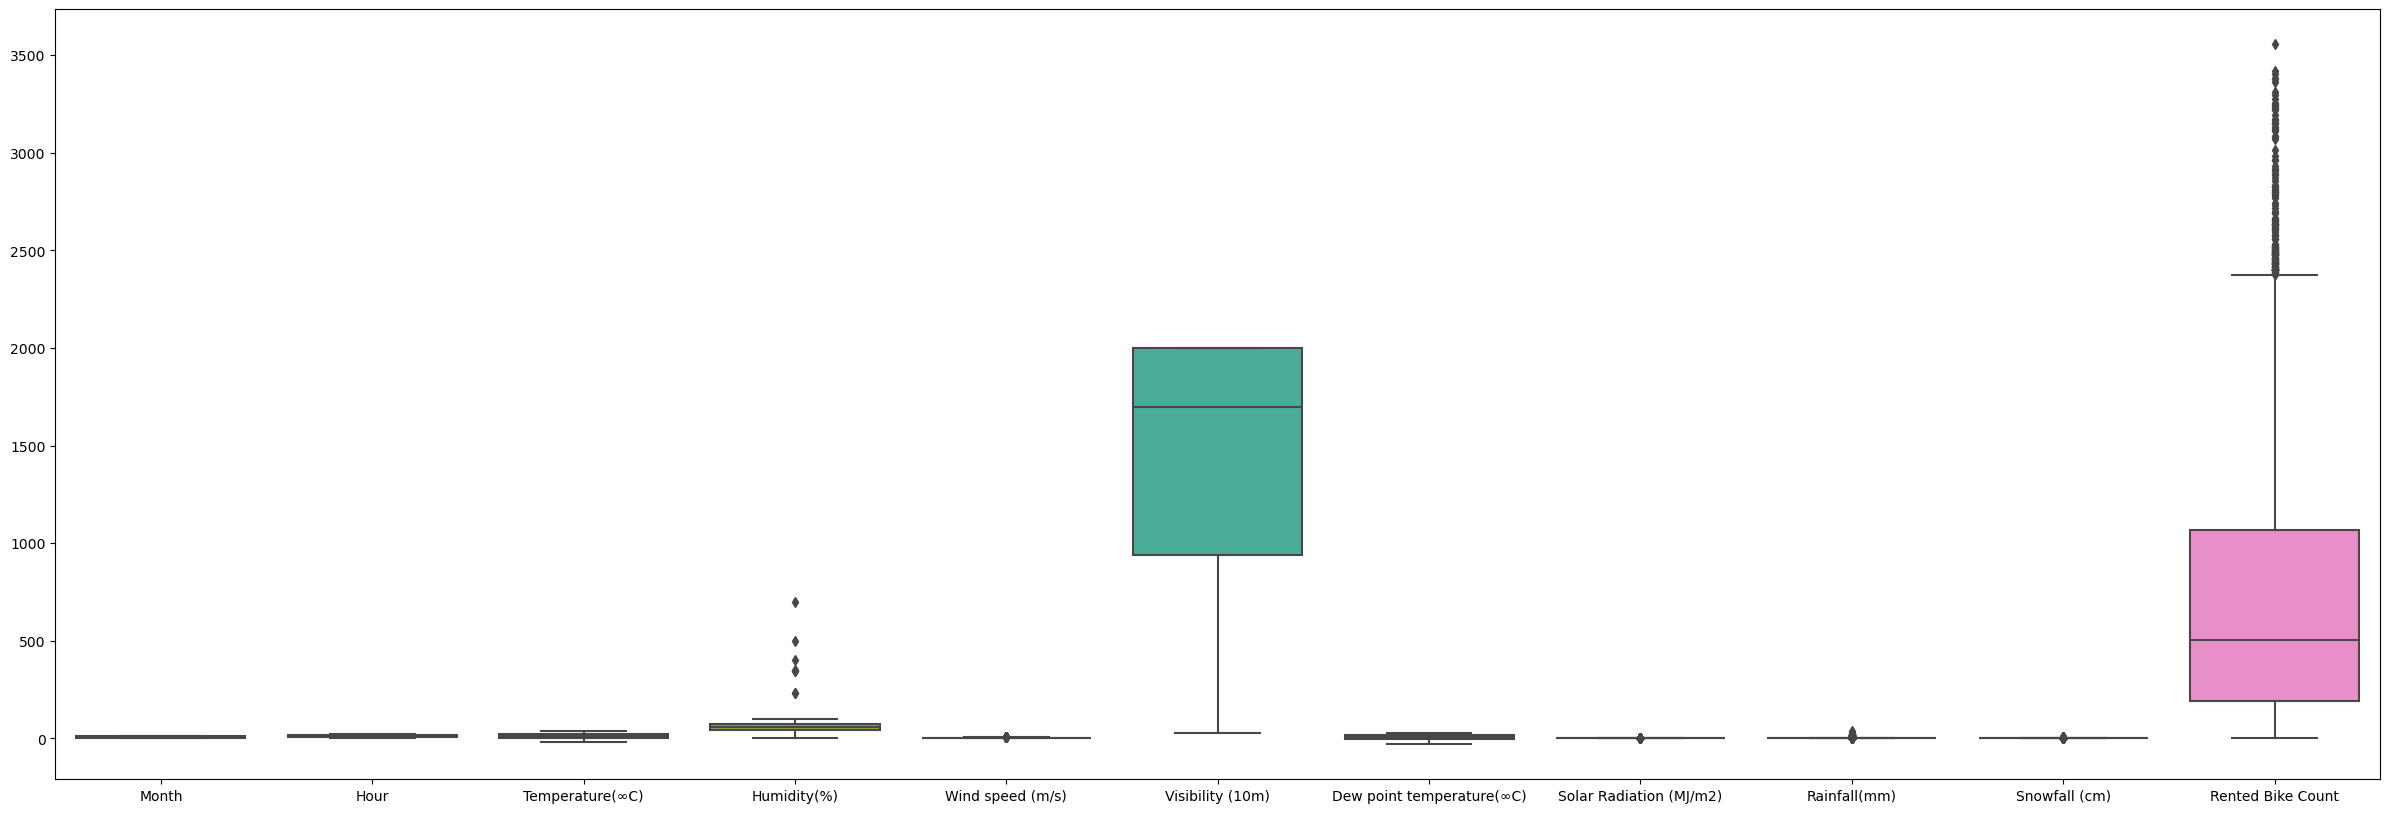

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
51,12,Sunday,3,3.4,71.0,1.6,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes,117
54,12,Sunday,6,3.4,86.0,2.5,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes,13
57,12,Sunday,9,3.5,91.0,1.8,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes,152
71,12,Sunday,23,3.9,500.0,1.3,194,2.4,0.00,0.0,0.0,Winter,No Holiday,Yes,303
78,12,Monday,6,1.2,76.0,3.7,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,11,Monday,5,2.1,88.0,1.4,323,0.3,0.00,0.0,0.3,Autumn,No Holiday,Yes,115
8646,11,Monday,6,1.8,88.0,1.1,313,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes,339
8647,11,Monday,7,1.7,89.0,1.3,295,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes,819
8648,11,Monday,8,NaN,84.0,1.1,396,-0.4,0.03,0.0,0.3,Autumn,No Holiday,Yes,1524


,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,12,Friday,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,12,Friday,1,-5.5,NaN,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,12,Friday,2,-6.0,39.0,NaN,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,12,Friday,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,12,Friday,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,Friday,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,11,Friday,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,11,Friday,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,11,Friday,22,NaN,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


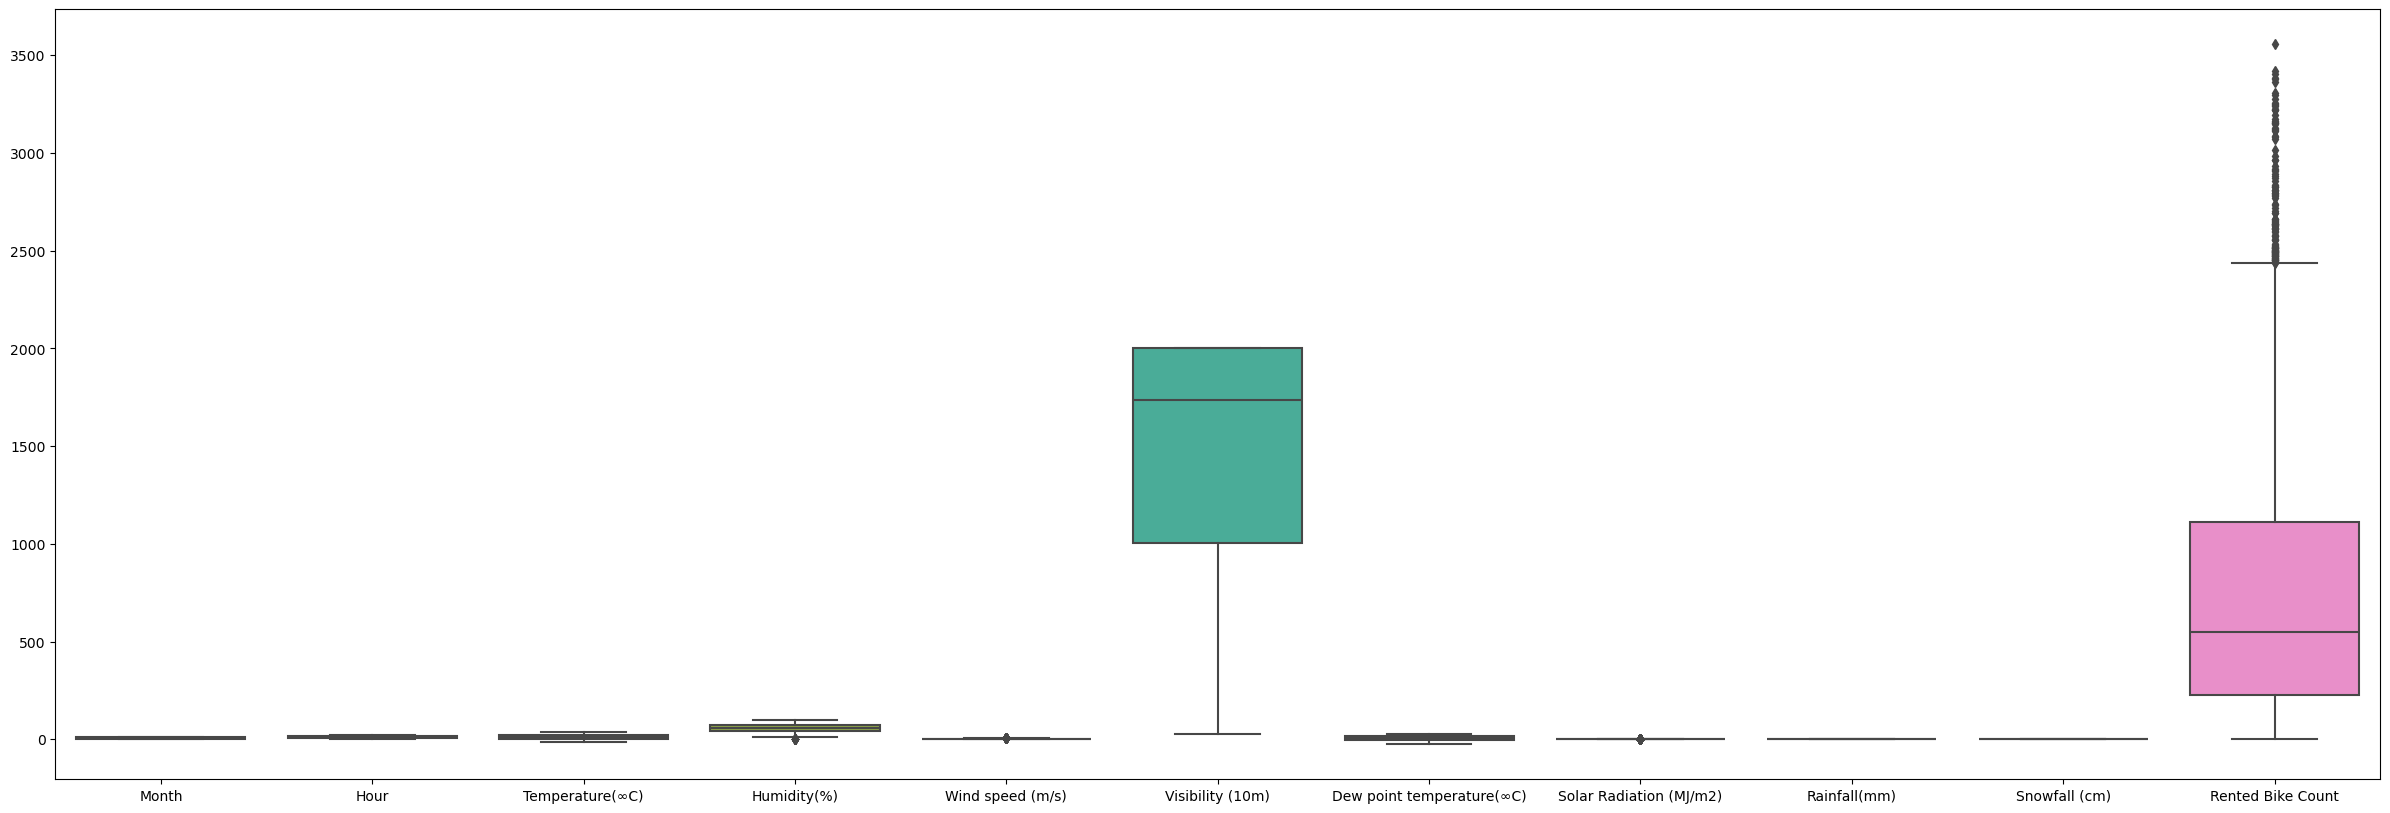

In [38]:
numerical_columns = df.select_dtypes(exclude = 'object').columns.drop(["Month", 'Hour', "Rented Bike Count"])

IQR = df[numerical_columns].quantile(0.75) - df[numerical_columns].quantile(0.25)
upper_whisker = df[numerical_columns].quantile(0.75) + 1.5 * IQR
lower_whisker = df[numerical_columns].quantile(0.25) - 1.5 * IQR
    
is_outlier = (df[numerical_columns] > upper_whisker) | (df[numerical_columns] < lower_whisker)
outliers = is_outlier.any(axis = 1)

plt.figure(figsize=(30,10))
sns.boxplot(df)
plt.show()

outliers_indices = []
for a, b in enumerate(outliers):
    if b == True:
        outliers_indices.append(a)
display(df[outliers])
newDf = df.drop(axis='index', index=outliers_indices)
display(newDf)

plt.figure(figsize=(30,10))
sns.boxplot(newDf)
plt.show()

<h2 style=font-size:20px><b><u>Data Imputation</u></h2>

<br>Let's find out and display the rows that contain missing/NaN values.<br><br>

In [39]:
null_rows = df[df.isna().any(axis=1)]
null_rows

,Month,Day,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
1,12,Friday,1,-5.5,NaN,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,204
2,12,Friday,2,-6.0,39.0,NaN,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,173
14,12,Friday,14,NaN,26.0,2.0,2000,-14.6,1.01,0.0,0.0,Winter,No Holiday,Yes,447
17,12,Friday,17,NaN,58.0,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,555
19,12,Friday,19,0.0,NaN,1.7,2000,-3.5,0.00,0.0,0.0,Winter,No Holiday,Yes,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,11,Thursday,14,6.0,NaN,0.6,1452,-11.6,0.34,0.0,0.0,Autumn,No Holiday,Yes,668
8738,11,Friday,2,0.6,66.0,NaN,1368,-5.0,0.00,0.0,0.0,Autumn,No Holiday,Yes,300
8745,11,Friday,9,-0.4,NaN,0.6,1270,-7.8,0.45,0.0,0.0,Autumn,No Holiday,Yes,809
8753,11,Friday,17,NaN,29.0,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,1047


<br>Now, let's impute the missing values with the means/medians of the corresponding columns. Since, we have already removed the outliers, the imputed means in the numerical columns will be more accurate to the dataset due to no influence from outliers.<br><br>

In [40]:
null_columns = df.columns[df.isna().any()] # Storing all the columns containing atleast one NaN value
for c in null_columns:
    if df[c].dtype != 'object':
        value = df[c].mean()
    else:
        value = df[c].mode()[0]
        
    df[c] = df[c].fillna(value)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      8760 non-null   int32  
 1   Day                        8760 non-null   object 
 2   Hour                       8760 non-null   int64  
 3   Temperature(∞C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(∞C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<br><h1 style=font-size:30px><b>Model Planning</h1>

In [42]:
df.groupby("Day")["Rented Bike Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Friday,1272.0,747.117925,658.396481,0.0,233.00,566.0,1115.25,3365.0
Monday,1248.0,730.563301,664.960809,2.0,186.00,533.0,1099.00,3380.0
Saturday,1248.0,709.528846,603.913165,0.0,219.00,519.0,1076.00,2497.0
Sunday,1248.0,625.155449,605.529274,0.0,158.75,406.0,936.50,2514.0
Thursday,1248.0,690.704327,641.675659,0.0,185.00,495.0,1049.00,3418.0
Tuesday,1248.0,687.977564,652.165697,0.0,179.50,485.5,1031.50,3556.0
Wednesday,1248.0,740.349359,677.573675,0.0,206.75,536.5,1107.25,3384.0


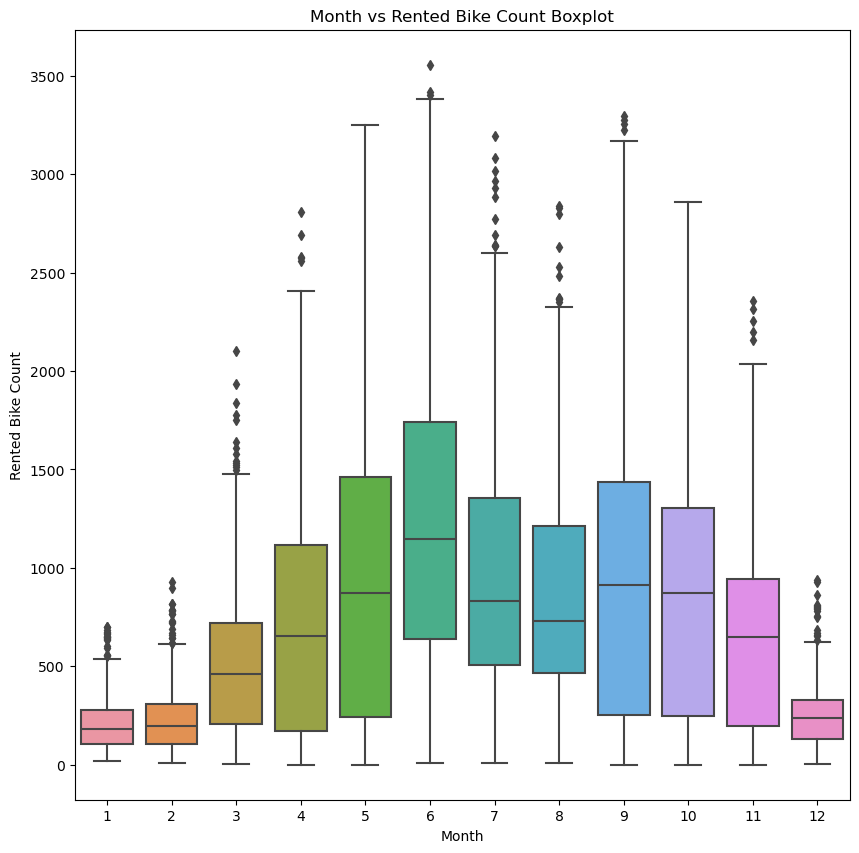

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Month", y="Rented Bike Count", data=df)
plt.xlabel("Month")
plt.ylabel("Rented Bike Count")
plt.title("Month vs Rented Bike Count Boxplot") 
plt.show()

<br>
<ul>
<li>It can be observed from the above boxplot that the number of rented bikes in Seoul drop considerably in the colder months of the year (Months 11 to 2) and are generally higher during the warmer months (Months 5 to 10).

<li>This can supported by the fact that the summers in Seoul (in fact the whole of South Korea) are generally moderately hot with the highest temperatures reaching around 30°C. In contrast, the winters are extremely cold with the average temperature revolving around 0°C. 

<li>The general population would prefer to ride the bikes in a more pleasant climate (i.e summer) than a more physically demanding climate (i.e winter), supporting the overall trend.
</ul>
<br><br>

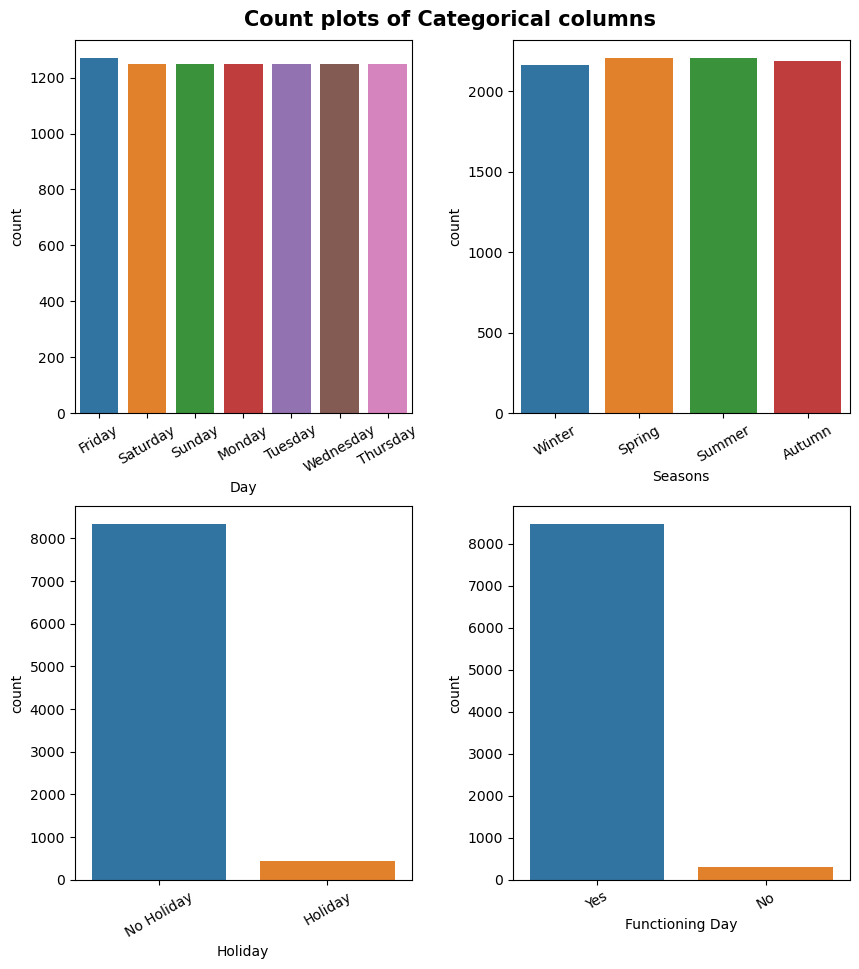

In [44]:
#univariate graphs for categorical columns
obj_columns = df.select_dtypes('object').columns

fig,axes = plt.subplots(len(obj_columns) // 2, 2, figsize=(10, 10))
for index, column in enumerate(obj_columns):
        sns.countplot(x=column, data=df, ax=axes.flatten()[index])
        axes.flatten()[index].set_xlabel(f"{column}", fontsize='medium')
        axes.flatten()[index].set_xticklabels(axes.flatten()[index].get_xticklabels(), rotation=30)
        
plt.suptitle('Count plots of Categorical columns', fontsize= 15, fontweight='bold')
plt.subplots_adjust(top = 0.95, hspace = 0.25, wspace = 0.3)
plt.show()
    

<br>
<ul>
<li>The count plot for 'Season' has the highest number of bike rental users during summer

<li>The plot for the 'Holiday' column might suggest that casual bike rentals are higher on non-holidays compared to holidays. It could give the implication that people basically use bikes to get to work rather than for leisure.

<li>The count plot for 'Functioning Day' may show the user that bike rentals are invariably high whenever the bike rental system is functioning. This is understandable and illustrates the importance of the system being available to ensure rental numbers.

<li>The rentals of bikes are at their peak in the summer, thus stating that biking behavior has a very strong seasonal trend. Furthermore, higher rentals on non-holidays reflect that bicycles are mostly used for commuting.
</ul>
<br><br>

C:\Users\delll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\delll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\delll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\delll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

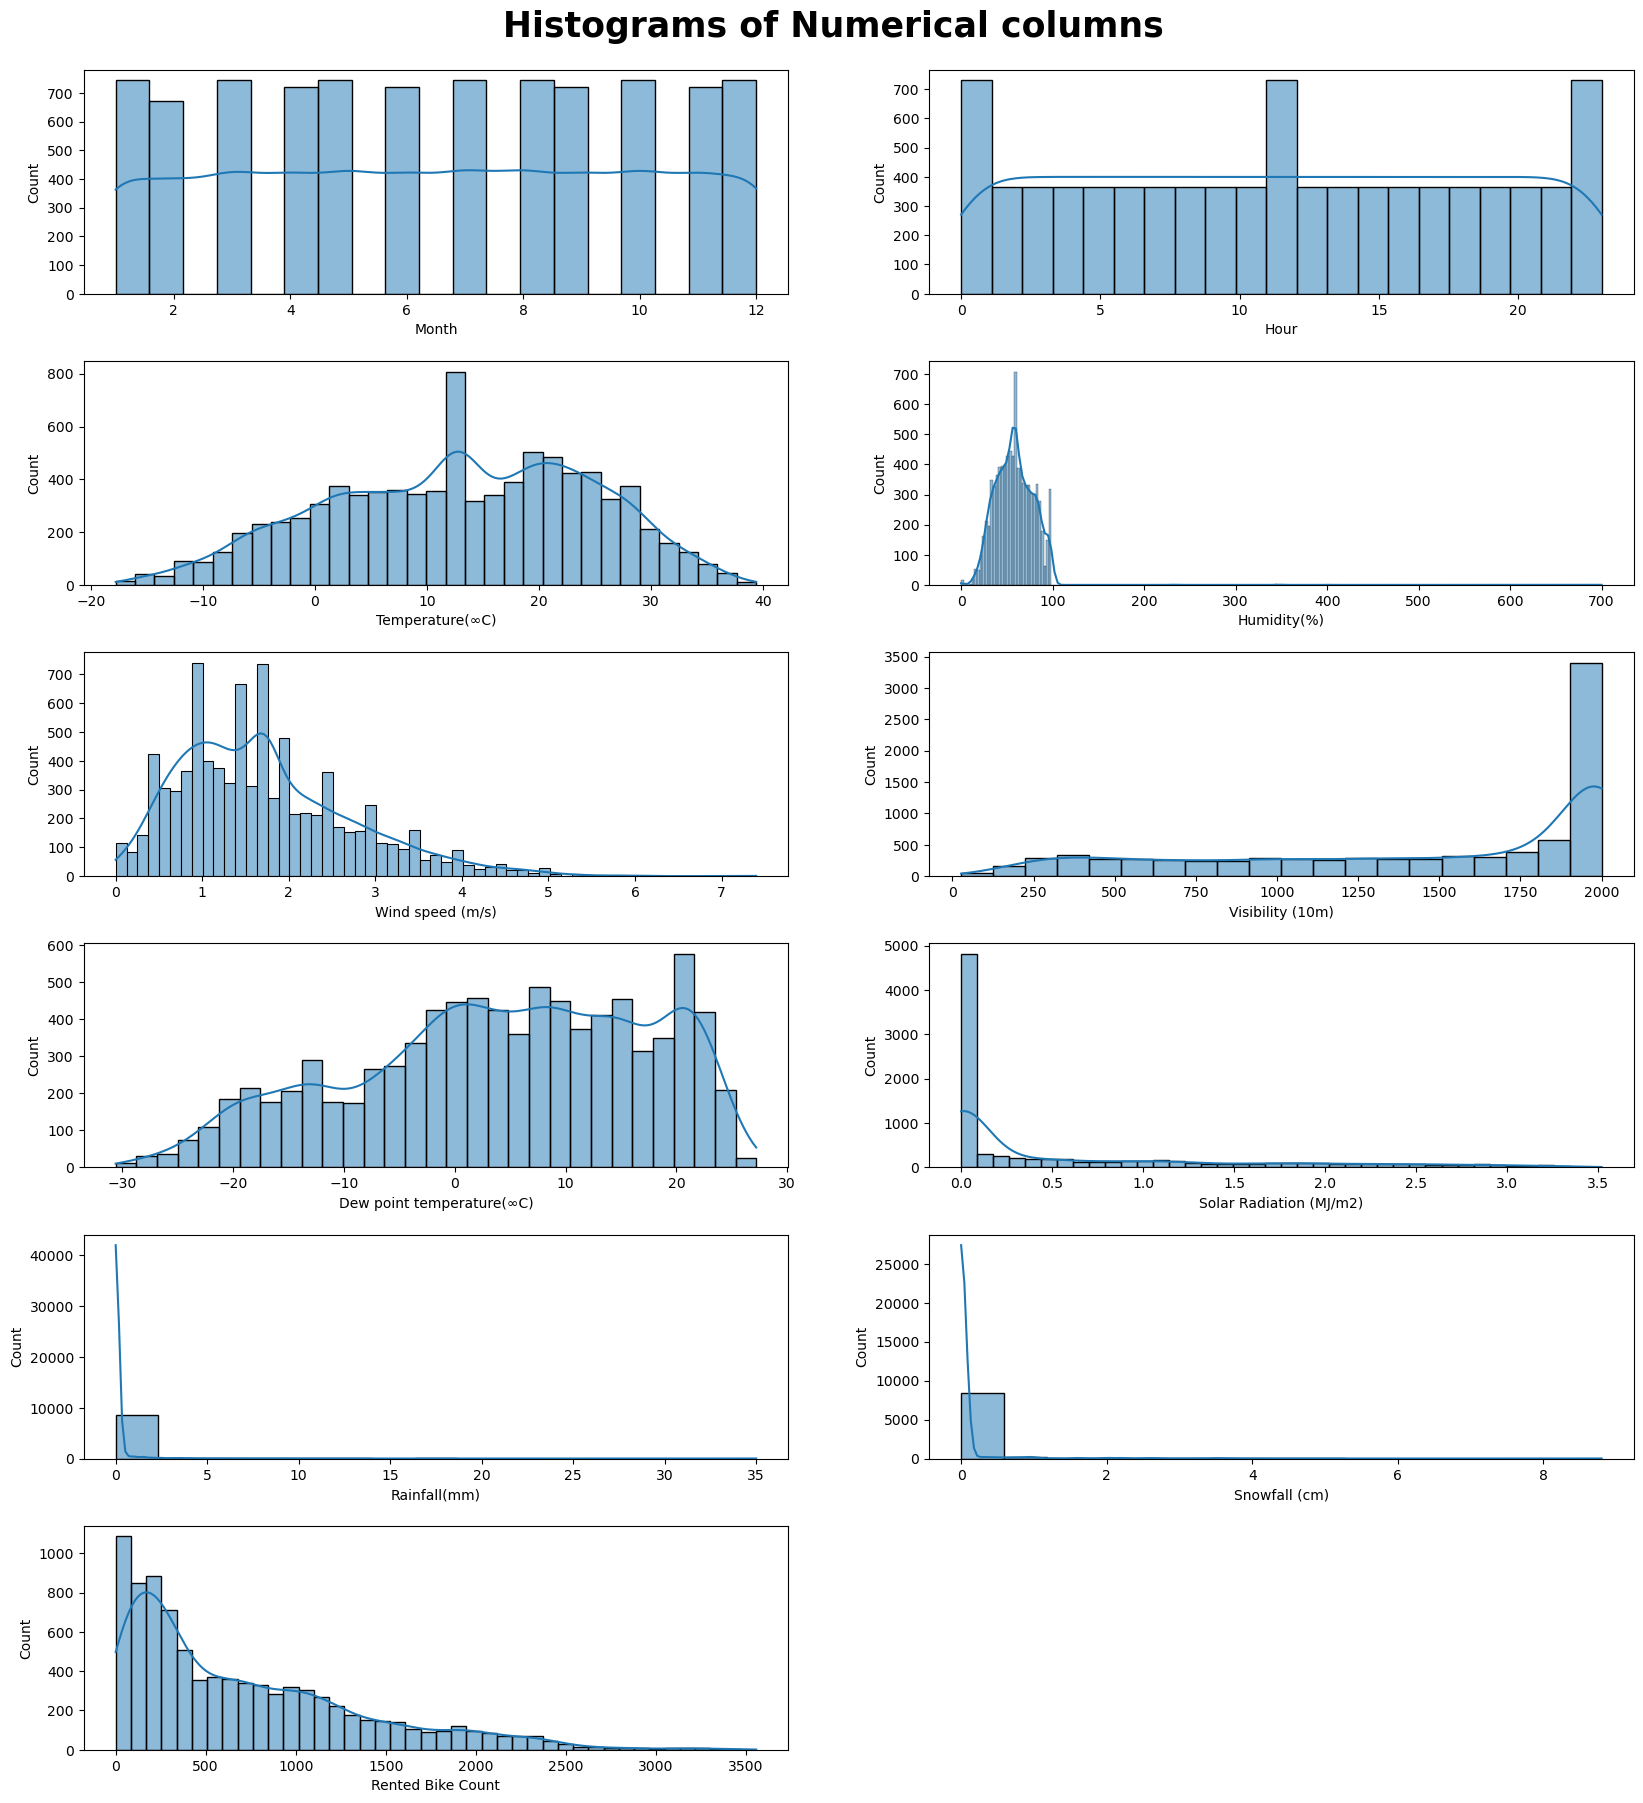

In [45]:
numerical_columns =  df.select_dtypes('number').columns

fig,axes = plt.subplots(len(numerical_columns) // 2 + 1 , 2, figsize=(20, 20))
for index, column in enumerate(numerical_columns):
        sns.histplot(x=column,data=df, kde = True, ax=axes.flatten()[index])
        axes.flatten()[index].set_xlabel(f"{column}", fontsize='medium')
        
fig.delaxes(axes.flatten()[index + 1])
plt.suptitle('Histograms of Numerical columns', fontsize= 25, fontweight='bold')
plt.subplots_adjust(top = 0.95, hspace = 0.3)
plt.show()

<br>
<ul>
<li>Temperature follows at least approximately the normal distribution centering around 15°C, whereas humidity peaks roughly between 60-80%, indicating generally mild temperatures and rather high to moderate humidity.

<li>Both wind speed and solar radiation are right-skewed. Most wind speeds are low, and most days have low solar radiation.

<li>Both Rainfall and Snofall are highly right-skewed, indicating that most days have little to no rainfall or snowfall.

<li>Distributions of numerical columns of this dataset show that weather is mostly mild, the relative humidity is moderate to high, wind speed is low, and solar radiation is low; the rainfall and snowfall are infrequent, although sometimes heavy. This information is essential for understanding the conditions within which bike renting is occurring and developing a predictive model.
</ul>
<br><br>

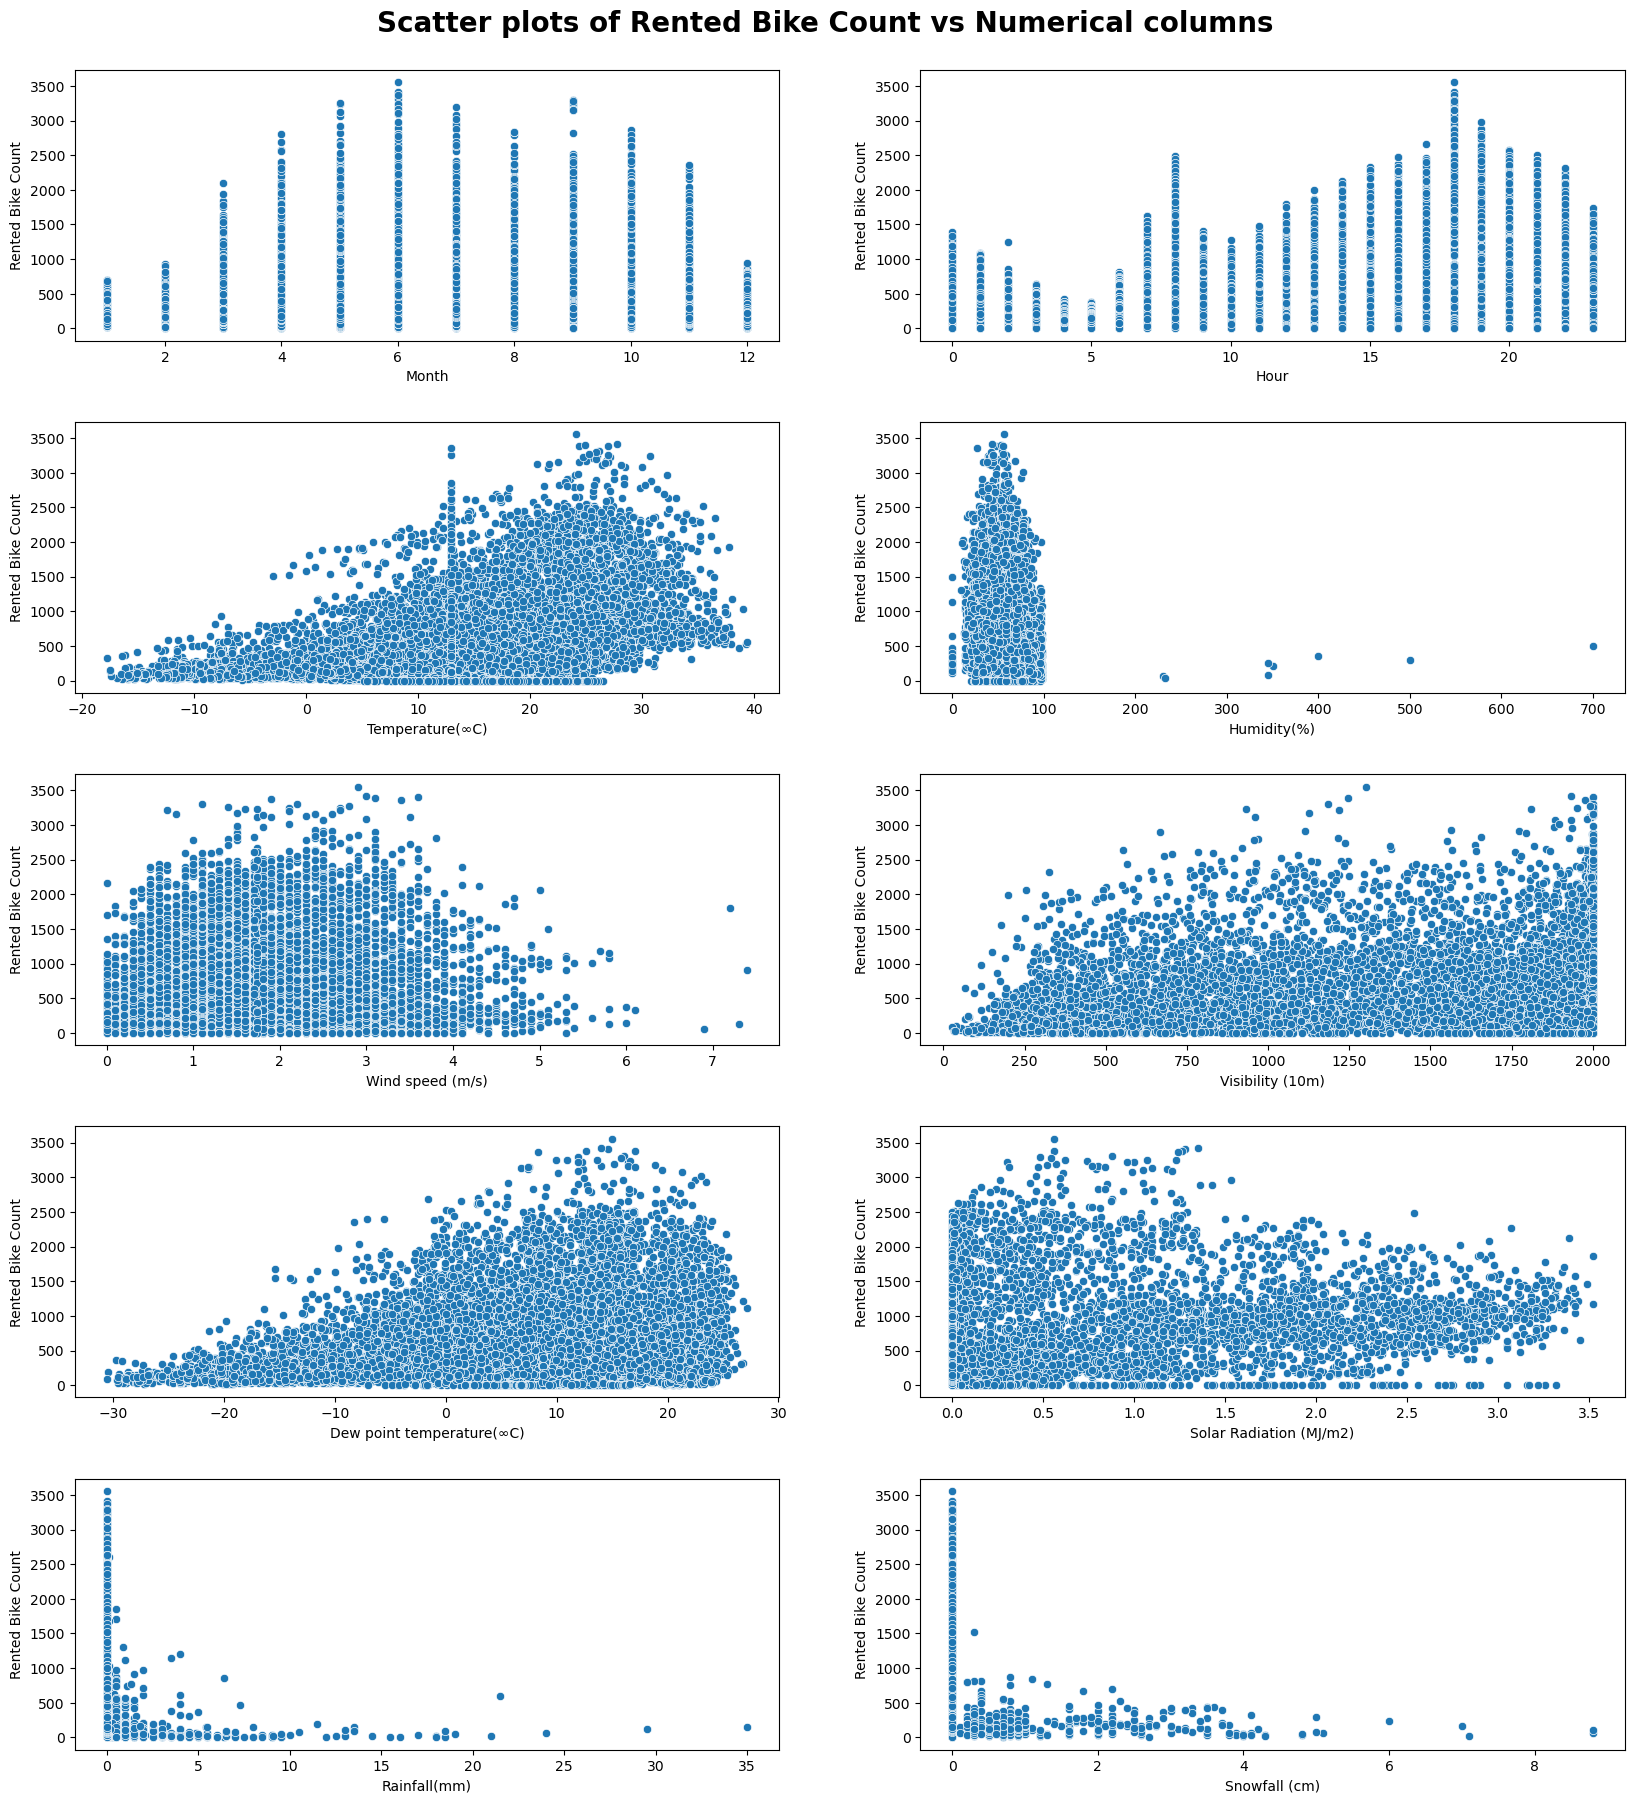

In [46]:
#bivariate graphs based on two numerical variables
numerical_columns =  df.select_dtypes('number').columns.drop("Rented Bike Count")

fig,axes = plt.subplots(len(numerical_columns) // 2 , 2, figsize=(20, 20))
for index, column in enumerate(numerical_columns):
        sns.scatterplot(x=column,y='Rented Bike Count',data=df, ax=axes.flatten()[index])
        axes.flatten()[index].set_xlabel(f"{column}", fontsize='medium')
        
plt.suptitle('Scatter plots of Rented Bike Count vs Numerical columns', fontsize= 20, fontweight='bold')
plt.subplots_adjust(top = 0.95, hspace = 0.3)
plt.show()

<br>
<ul>
<li> There appears to be a positive correlation between temperature and the number of rented bikes, suggesting that bike rentals increase as the temperature rises.

<li>Bike rentals decline with increasing wind and rainfall because bad weather discourages riding.

<li> It can be seen that more sunlight encourages more bike rentals.

<li> As shown in the graphs, Humidity and visibility do not significantly impact bike rentals.

<li>Conclusion : bike rentals are higher in favorable weather conditions like warmer temperatures, lower wind speeds, and more sunlight. In addition, there are some factors such as humidity and visibility that do not have a clear impact on bike renting.
</ul>
<br><br>

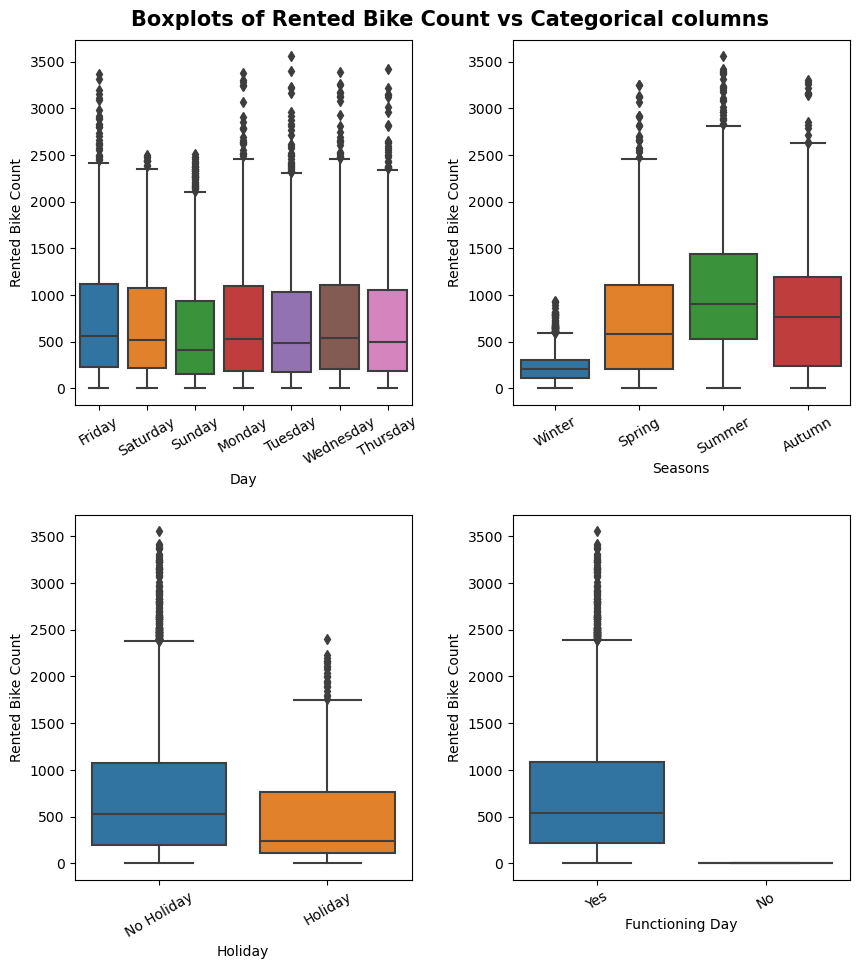

In [47]:
#bivariate graphs based on Rented Bike count and categorical variables
cat_cols =  df.select_dtypes('object').columns

fig,axes = plt.subplots(len(cat_cols) // 2, 2, figsize=(10, 10))
for index, column in enumerate(cat_cols):
        sns.boxplot(x=column,y='Rented Bike Count',data=df, ax=axes.flatten()[index])
        axes.flatten()[index].set_xlabel(f"{column}", fontsize='medium')
        axes.flatten()[index].set_xticklabels(axes.flatten()[index].get_xticklabels(), rotation=30)
        
plt.suptitle('Boxplots of Rented Bike Count vs Categorical columns', fontsize= 15, fontweight='bold')
plt.subplots_adjust(top = 0.95, hspace = 0.3, wspace = 0.3)
plt.show()

<br>
<ul>
<li>It can be inferred from the above boxplots that the renting of bikes is the highest in the summer season.

<li>Furthermore, throughout the week, the distribution of bike rentals is overall uniform in nature.

<li>However the working days of M-T-W-R display a slightly higher median number of bike rentals, perhaps indicating that the bike rentals might be more popular amongst students and office workers, who are usually active and travelling on these days.

<li>This claim can further be supported by the fact that the bike rentals are higher on non-holiday/non-weekend days as compared to holiday/weekend days. This could also mean that people rent the bikes more for transportation purposes than for entertainment/leisure activity purposes.
</ul>
<br><br>